# Robust PCA Example

Robust PCA is an awesome relatively new method for factoring a matrix into a low rank component and a sparse component.  This enables really neat applications for outlier detection, or models that are robust to outliers.

In [58]:
%matplotlib inline

### Make Some Toy Data

In [59]:
import matplotlib.pyplot as plt
import numpy as np

In [60]:
def mk_rot_mat(rad=np.pi / 4):
    rot = np.array([[np.cos(rad),-np.sin(rad)], [np.sin(rad), np.cos(rad)]])
    return rot

In [61]:
rot_mat = mk_rot_mat( np.pi / 4)
x = np.random.randn(100) * 5
y = np.random.randn(100)
points = np.vstack([y,x])

In [62]:
rotated = np.dot(points.T, rot_mat).T

### Add Some Outliers to Make Life Difficult

In [63]:
outliers = np.tile([15,-10], 10).reshape((-1,2))

In [64]:
pts = np.vstack([rotated.T, outliers]).T

### Compute SVD on both the clean data and the outliery data

In [65]:
U,s,Vt = np.linalg.svd(rotated)
U_n,s_n,Vt_n = np.linalg.svd(pts)

### Just 10 outliers can really screw up our line fit!

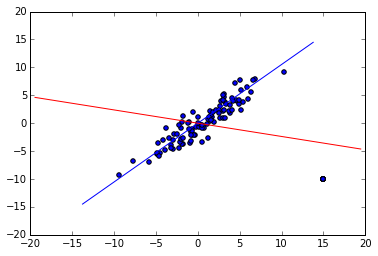

In [66]:
plt.ylim([-20,20])
plt.xlim([-20,20])
plt.scatter(*pts)
pts0 = np.dot(U[0].reshape((2,1)), np.array([-20,20]).reshape((1,2)))
plt.plot(*pts0)
pts1 = np.dot(U_n[0].reshape((2,1)), np.array([-20,20]).reshape((1,2)))
plt.plot(*pts1, c='r')

### Now the robust pca version!

In [67]:
import rpca

In [68]:
reload(rpca)

<module 'rpca' from 'rpca.pyc'>

In [69]:
import logging
logger = logging.getLogger(rpca.__name__)
logger.setLevel(logging.INFO)

### Factor the matrix into L (low rank) and S (sparse) parts

In [70]:
L,S = rpca.rpca(pts, eps=0.0000001, r=1)

INFO:rpca:Number of iterations: 212 to achieve eps = 0.000000


### Run SVD on the Low Rank Part

In [71]:
U,s,Vt = np.linalg.svd(L)

### And have a look at this!

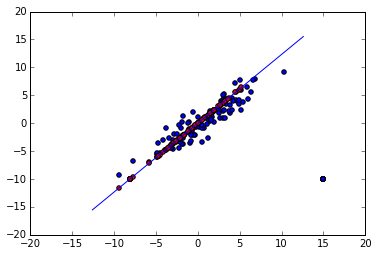

In [72]:
plt.ylim([-20,20])
plt.xlim([-20,20])
plt.scatter(*pts)
pts0 = np.dot(U[0].reshape((2,1)), np.array([-20,20]).reshape((1,2)))
plt.plot(*pts0)
plt.scatter(*L, c='red')

### Have a look at the factored components...

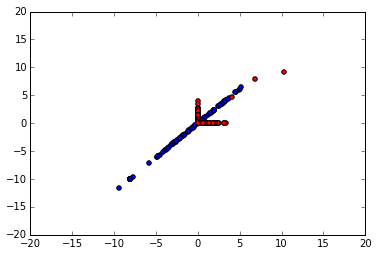

In [73]:
plt.ylim([-20,20])
plt.xlim([-20,20])
plt.scatter(*L)
plt.scatter(*S, c='red')

### It really does add back to the original matrix!

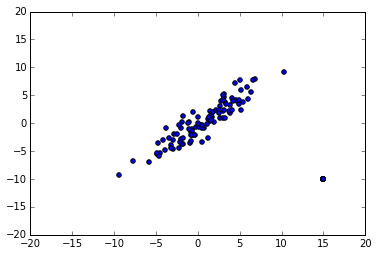

In [74]:
plt.ylim([-20,20])
plt.xlim([-20,20])
plt.scatter(*(L+S))